# Linked-in profile Analysis
                                                            



This notebook will address the following questions:

1. **Which months in 2023 and 2024 saw the highest engagement and impressions?**
2. **On which days did my posts receive the most engagement and impressions in 2023 and 2024?**
3. **How has the number of followers changed over time?**
4. **Between engagement and impressions, which has a greater impact on new follower?**
5. **What insights can be drawn from demographic sheet ?**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [475]:
path = "D:/Content_2023-08-20_2024-08-18_MazenMohamed.xlsx"
df = pd.read_excel(path, sheet_name='ENGAGEMENT')

# EDA: Exploratory Data Analysis

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         365 non-null    object
 1   Impressions  365 non-null    int64 
 2   Engagements  365 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 8.7+ KB


In [11]:
# changing the column date type
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         365 non-null    datetime64[ns]
 1   Impressions  365 non-null    int64         
 2   Engagements  365 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 8.7 KB


In [13]:
# creating month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.strftime('%B')
df['Day'] = df['Date'].dt.strftime('%a')
df

,Date,Impressions,Engagements,Year,Month,Day
0,2023-08-20,0,0,2023,August,Sun
1,2023-08-21,0,0,2023,August,Mon
2,2023-08-22,0,0,2023,August,Tue
3,2023-08-23,0,0,2023,August,Wed
4,2023-08-24,0,0,2023,August,Thu
...,...,...,...,...,...,...
360,2024-08-14,1315,8,2024,August,Wed
361,2024-08-15,1198,10,2024,August,Thu
362,2024-08-16,918,7,2024,August,Fri
363,2024-08-17,2985,30,2024,August,Sat


In [203]:
df_sorted = df.sort_values(by='Year').reset_index(drop=True)
grouped_months = df_sorted.groupby(['Year', 'Month'])[['Impressions', 'Engagements']].sum().reset_index()
filtered_months = grouped_months[grouped_months['Impressions'] != 0]
filtered_months

,Year,Month,Impressions,Engagements
8,2023,September,246,2
9,2023,October,83,2
10,2023,November,512,7
11,2023,December,340,8
12,2024,January,159,2
13,2024,February,1089,4
14,2024,March,1927,24
15,2024,April,75696,594
16,2024,May,51858,346
17,2024,June,201867,1300


# 1. Which months in 2023 and 2024 saw the highest engagement and impressions?

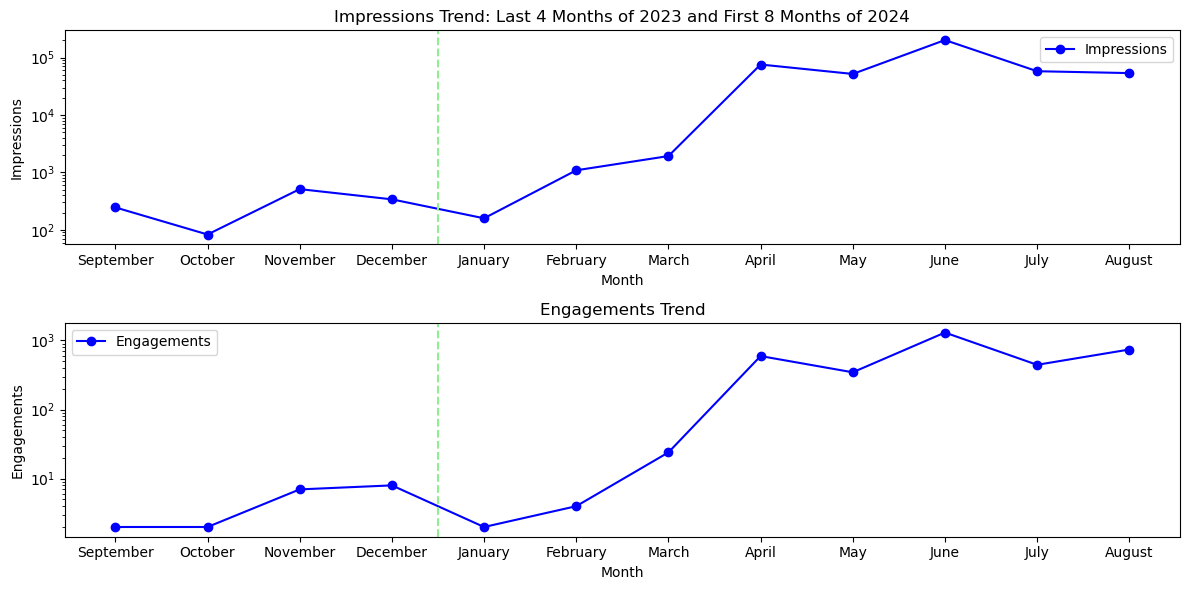

In [207]:
fig = plt.figure(figsize=(12, 6))

ax0 = fig.add_subplot(2, 1, 1)
ax1 = fig.add_subplot(2, 1, 2)

ax0.plot(filtered_months['Month'], filtered_months['Impressions'], marker='o', color='b', label='Impressions')
ax0.set_xlabel('Month')
ax0.set_ylabel('Impressions')
ax0.set_title('Impressions Trend: Last 4 Months of 2023 and First 8 Months of 2024')
ax0.legend()
ax0.axvline(x=3.5, color='lightgreen', linestyle='--', label='Year Separator')
ax0.set_yscale('log')

ax1.plot(filtered_months['Month'], filtered_months['Engagements'], marker='o', color='b', label='Engagements')
ax1.set_xlabel('Month')
ax1.set_ylabel('Engagements')
ax1.set_title('Engagements Trend')
ax1.legend()
ax1.axvline(x=3.5, color='lightgreen', linestyle='--', label='Year Separator')
ax1.set_yscale('log')

plt.tight_layout()
plt.show()

# 2. On which days did my posts receive the most engagement and impressions in 2023 and 2024 ?

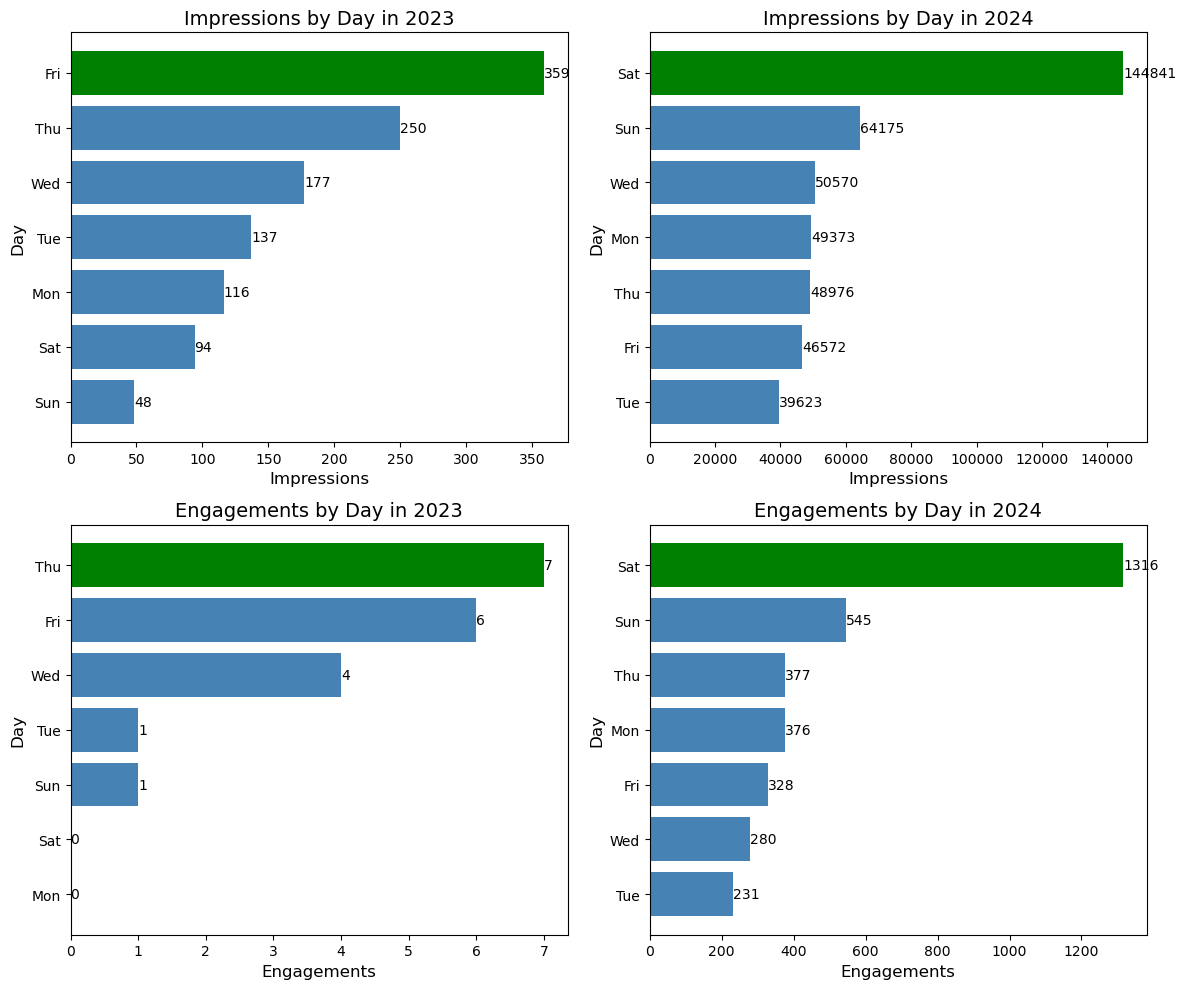

In [346]:
def generate_colors(data, max_value):
    return ['green' if val == max_value else 'steelblue' for val in data]

def plot_bar_chart(ax, data, column, max_value, title, ylabel):
    colors = generate_colors(data[column], max_value)
    ax.barh(data['Day'], data[column], color=colors)
    ax.set_title(title, fontsize=14)
    ax.set_xlabel(column, fontsize=12)  
    ax.set_ylabel(ylabel, fontsize=12)
    # Highlight the max value bar
    for i, (value, color) in enumerate(zip(data[column], colors)):
        ax.text(value, i, f'{value}', va='center', ha='left', color='black', fontsize=10)

day_impressions_of_23 = year_23.groupby('Day')['Impressions'].sum().reset_index().sort_values(by='Impressions', ascending=True)
day_impressions_of_24 = year_24.groupby('Day')['Impressions'].sum().reset_index().sort_values(by='Impressions', ascending=True)
day_engagements_of_23 = year_23.groupby('Day')['Engagements'].sum().reset_index().sort_values(by='Engagements', ascending=True)
day_engagements_of_24 = year_24.groupby('Day')['Engagements'].sum().reset_index().sort_values(by='Engagements', ascending=True)

max_impressions_2023 = day_impressions_of_23['Impressions'].max()
max_impressions_2024 = day_impressions_of_24['Impressions'].max()
max_engagements_2023 = day_engagements_of_23['Engagements'].max()
max_engagements_2024 = day_engagements_of_24['Engagements'].max()

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

plot_bar_chart(axes[0, 0], day_impressions_of_23, 'Impressions', max_impressions_2023, 'Impressions by Day in 2023', 'Day')
plot_bar_chart(axes[0, 1], day_impressions_of_24, 'Impressions', max_impressions_2024, 'Impressions by Day in 2024', 'Day')
plot_bar_chart(axes[1, 0], day_engagements_of_23, 'Engagements', max_engagements_2023, 'Engagements by Day in 2023', 'Day')
plot_bar_chart(axes[1, 1], day_engagements_of_24, 'Engagements', max_engagements_2024, 'Engagements by Day in 2024', 'Day')

plt.tight_layout()

plt.show()


# 3. How has the number of followers changed over time?

In [360]:
df_followers['Date'] = pd.to_datetime(df_followers['Date'])
df_followers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           365 non-null    datetime64[ns]
 1   New followers  365 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB


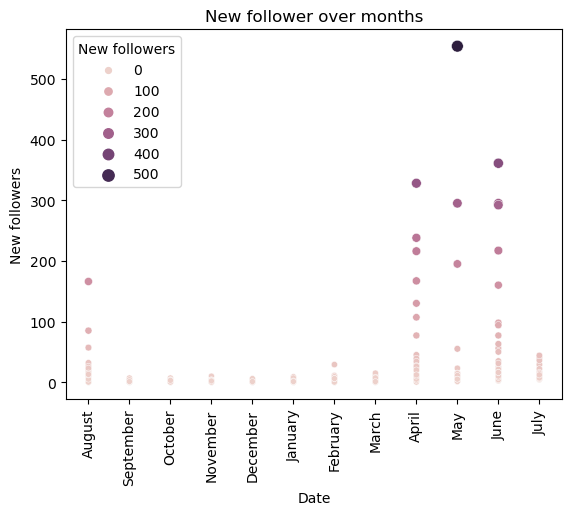

In [384]:
followers = df_followers['New followers']
month = df['Date'].dt.strftime('%B')
sns.scatterplot(data=df_followers, x=month, y=followers, size=followers, hue=followers, legend=True)

plt.xticks(rotation=90)
plt.title('New follower over months')
plt.show()

# 4. Between engagement and impressions, which has a greater impact on follower growth per post?

<Axes: >

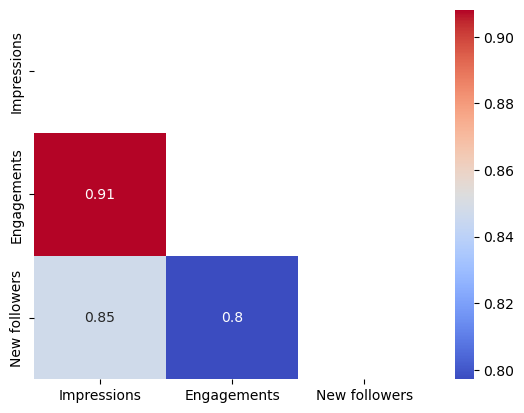

In [394]:
df_follower_Engagements = df.merge(df_followers)[['Impressions', 'Engagements', 'New followers']]
corr = df_follower_Engagements.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='coolwarm', annot=True, mask=np.triu(corr))

# 5. What insights can be drawn from demographic data related to engagement, impressions, and follower growth?

In [413]:
df_demographics = pd.read_excel(path, sheet_name='DEMOGRAPHICS')
df_demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Top Demographics  30 non-null     object
 1   Value             30 non-null     object
 2   Percentage        30 non-null     object
dtypes: object(3)
memory usage: 852.0+ bytes


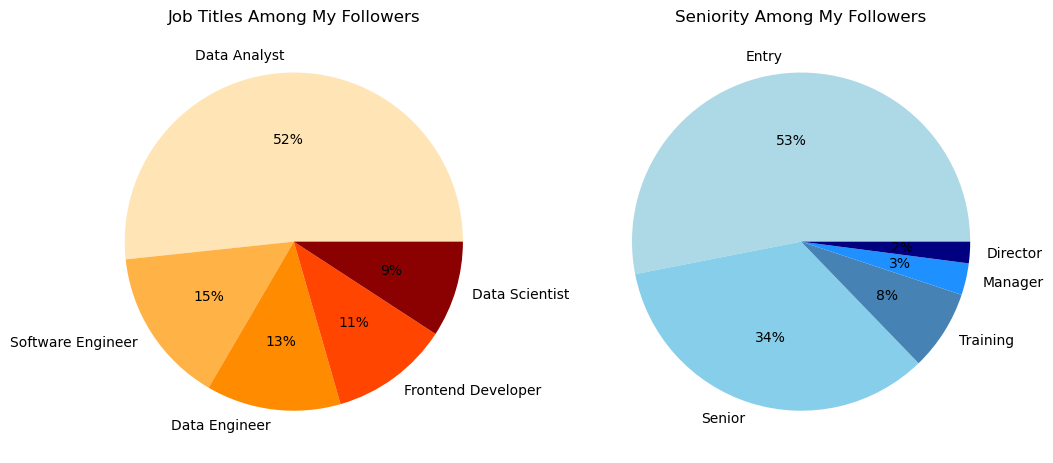

In [465]:
job_title = df_demographics[df_demographics['Top Demographics'] == 'Job titles'][['Value', 'Percentage']]
seniority = df_demographics[df_demographics['Top Demographics'] == 'Seniority'][['Value', 'Percentage']]

colors1 = ['#FFE4B5', '#FFB347', '#FF8C00', '#FF4500', '#8B0000']
colors2 = ['#ADD8E6', '#87CEEB', '#4682B4', '#1E90FF', '#000080']

fig = plt.figure(figsize=(12,6))
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

ax0.pie(job_title['Percentage'], labels=job_title['Value'], autopct='%1.f%%', colors=colors1)
ax0.set_title('Job Titles Among My Followers')

ax1.pie(seniority['Percentage'], labels=seniority['Value'], autopct='%1.f%%', colors=colors2)
ax1.set_title('Seniority Among My Followers')

plt.show()